In [16]:
# putting it all together 

import torch
from torch import nn
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

print(torch.__version__)

# setup device agnostic code  (make the code device agnostic(장치 독립적, 특정 장치(CPU또는 GPU)에 의존하지 않고 동작하도록 만듦))
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.7.1+cu126
Using device: cuda


tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
train_split: 40

 40 40 10 10


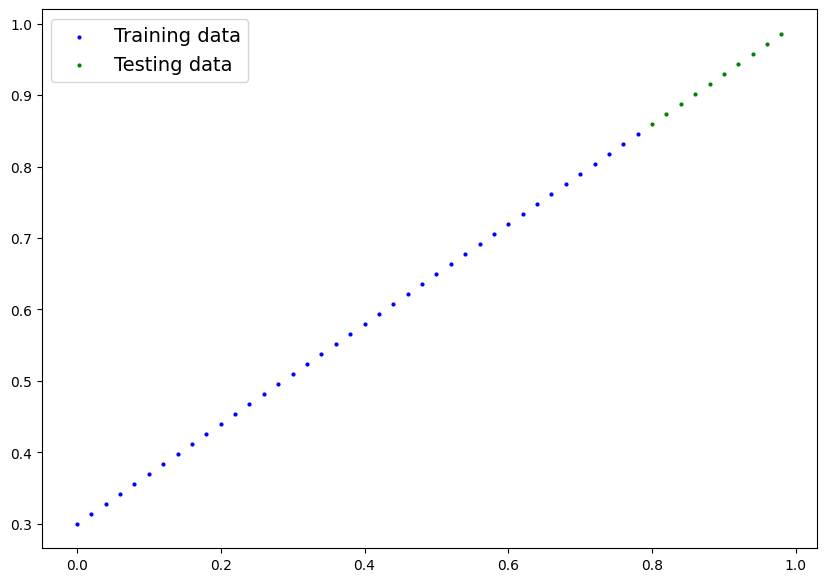

In [53]:
# Data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end,step).unsqueeze(dim=1)
y = weight*X +bias
print(X[:10],"\n",y[:10])

#split data
train_split = int(0.8*len(X))
print("train_split:",train_split)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print("\n",len(X_train), len(y_train), len(X_test), len(y_test))

plot_predictions(X_train, y_train, X_test, y_test)

런타임(runtime) : 프로그램(예: 파이썬 코드)을 실제로 실행하고 계산하는 컴퓨터 환경
런타임 초기화(runtime reset) : 현재 실행 중인 Python 환경을 완전히 리셋하는 것 (모든 변수, 함수, 객체, 모델, 불러온 라이브러리, 학습된 파라미터 등이 사라짐)

In [ ]:
# Building a PyTorch linear model
# nn.Parameter()를 이용하여 수동적으로 weight와 bias를 정의하는 대신, nn.Linear(in_features, out_features)를 사용
# in_features는 input_data의 차원(dimension), out_features는 output_data의 차원

# torch.nn 모듈에는 다양한 neural network layers(신경망 계층)를 포함한 pre-built computation(미리 구현된 연산)이 있음

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)   # create a random weight and bias parameter (nn.Linear를 사용하면 bias와 weight가 자동으로 생성)
                                                                       # nn.Linear이 내부적으로 nn.Parameter 객체를 만들어서 requires_grad=True가 자동으로 설정, 이후에 backward()에 지장이 안감
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # -> : return type hint, 입력 x가 torch.Tensor타입이고, 함수가 반환하는 값도 torch.Tensor임을 알려주는 역할
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
print(model_1,"\n",model_1.state_dict(),"\n")

# model's current device
print(next(model_1.parameters()).device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) 
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))]) 

cpu


In [31]:
# set model to GPU
model_1.to(device)
print(next(model_1.parameters()).device)

cuda:0


In [33]:
# Training

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.01)

torch.manual_seed(42)
epochs = 1000

# if the model is on the GPU, the data is on the GPU(and vice versa)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # training
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch%100 == 0:
        print(f"Epoch:{epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch:0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch:100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch:200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch:900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [34]:
from pprint import pprint  #pprint = pretty print
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [35]:
# making predictions
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
print(y_preds)

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')


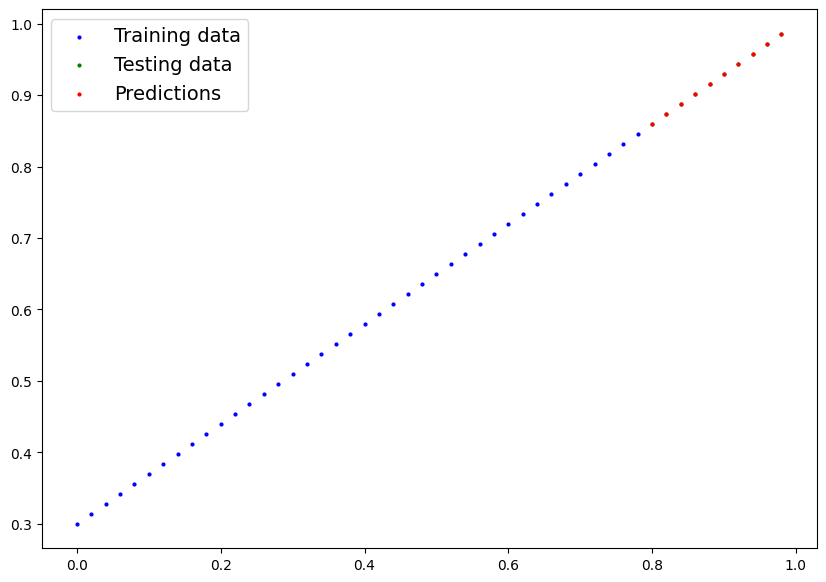

In [37]:
# Many data science libraries such as pandas, matplotlib and NumPy aren't capable of using data that is stored on GPU
# cpu에 저장되지 않은 tensor data로 위와 같은 함수들을 사용하고자 하면 문제가 날 수 있음
# 이를 해결하려면, 대상 텐서에 .cpu()를 호출하여 CPU에 복사된 텐서 사본을 반환

# plot_predictions(predictions=y_preds)  # TypeError

plot_predictions(predictions=y_preds.cpu())

In [ ]:
# Saving and loading a model

from pathlib import Path

# create models directory
MODEL_PATH = Path("models")  # "models"를 Path객체로 만드는 이유 : 운영체제에 독립적인 파일 경로 조작을 하기 위함(= 운영체재에 따라서 /,\를 맞춰줌), .mkdir과 같은 함수 지원
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME  # /는 경로 결합

# save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [43]:
# load it back (불러오기)
# 1. Create a new instance of the LinearRegressionModelV2(0 class)
# 2. Load in the model state dict using torch.nn.Module.load_state_dict()
# 3. Send the new instance of the model to the target device (to ensure our code is device-agnostic)

# Instantiate(인스턴스화하다) a fresh instance(새로운 인스턴스) of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}\n")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Model on device:
cuda:0


In [44]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

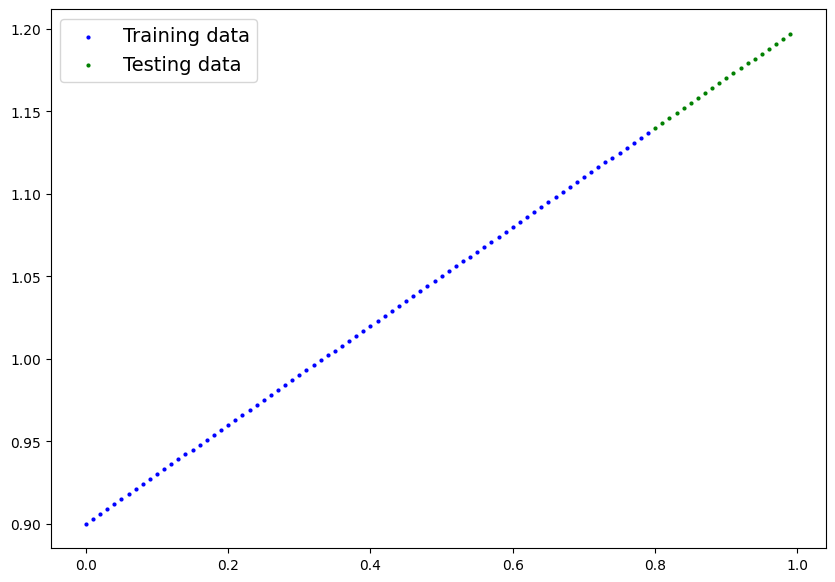

In [66]:
## Exercises

# 1. Create a straight line dataset using the linear regression formula (weight * X + bias)
weight = 0.3
bias = 0.9
X = torch.arange(0,1,0.01).unsqueeze(1) # unsqueeze를 사용하는 이유는 nn.Linear()에서 [n,1]형태의 입력을 받아야 작동하기 때문
y = weight*X+bias

train_split = int(len(X)*0.8)  # int로 변환하지 않으면 'TypeError: slice indices must be integers or None or have an __index__ method' 해당 오류가 뜸
X_train = X[:train_split] 
X_test = X[train_split:]
y_train = y[:train_split]
y_test = y[train_split:]

plot_predictions(X_train, y_train, X_test, y_test)

In [73]:
# 2. Build a PyTorch model by subclassing nn.Module.
import torch
from torch import nn

class exercise_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True) # PyTorch는 (모델 인스턴스).parameters()를 통해 어떤 값을 학습해야 하는지 파악함, 이 리스트에는 nn.Parameter로 지정된 텐서만 자동으로 포함됨
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad =True)  # nn.Parameter()를 사용하지 않으면 PyTorch가 학습 대상(최적화 대상)으로 인지하지 못함 / nn.Parameter()를 사용하지 않는다면 학습할 때 업데이트되지 않고 고정된 값으로 남음
    
    #def __init__(self):
    #    super().__init__()
    #    self.linear_layer = nn.Linear(1,1)

    def forward(self, x:torch.Tensor):   # :torch.Tensor의 역할은 입력값 타입 힌트로, x에 torch.Tensor 타입이 들어오기를 의도한다는 의미 (강제성은 없음, 내부적으로 자동 완성 및 오류 감지 시행)
        return self.weight * x + self.bias

exercise_md = exercise_model()
print(exercise_md.state_dict())

OrderedDict([('weight', tensor([-0.6380])), ('bias', tensor([0.4617]))])


In [ ]:
# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=exercise_md.parameters(), lr=0.01)

epochs = 300
for epoch in range(epochs):
    exercise_md.train()
    y_pred = exercise_md(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step

    exercise_md.eval() #evaluate
    if epoch%20 ==0:
        with torch.inference_mode():
            test_pred = exercise_md(X_test)
            test_loss = loss_fn(test_pred,y_test)
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 20 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 40 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 60 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 80 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 100 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 120 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 140 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 160 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 180 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 200 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 220 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 240 | Train Loss: 0.8088515996932983 | Test Loss: 1.2778499126434326
Epoch: 260 | Train

tensor([[-0.0487],
        [-0.0551],
        [-0.0615],
        [-0.0679],
        [-0.0743],
        [-0.0806],
        [-0.0870],
        [-0.0934],
        [-0.0998],
        [-0.1062],
        [-0.1125],
        [-0.1189],
        [-0.1253],
        [-0.1317],
        [-0.1381],
        [-0.1444],
        [-0.1508],
        [-0.1572],
        [-0.1636],
        [-0.1700]])


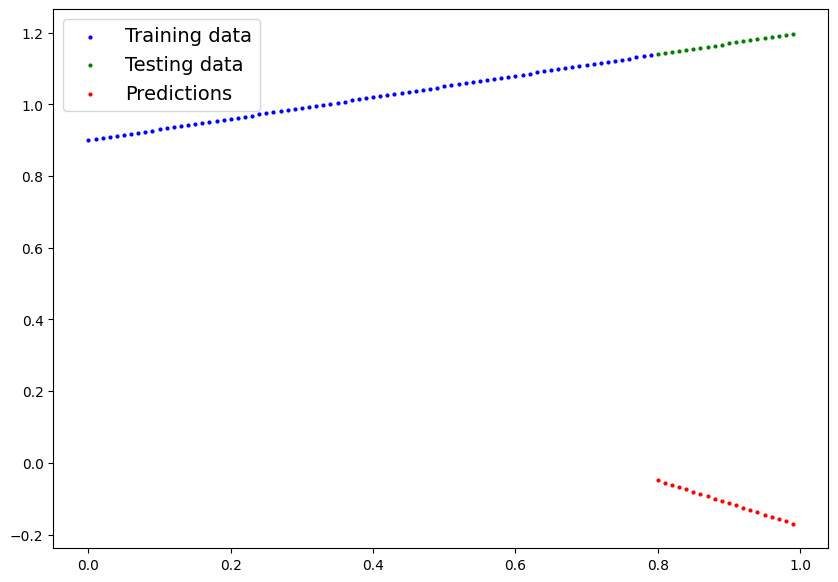

In [91]:
# 4. Make predictions with the trained model on the test data.
exercise_md.eval()
with torch.inference_mode():
    pred = exercise_md(X_test)
print(pred)

plot_predictions(X_train,y_train,X_test, y_test,predictions=pred)

In [ ]:
# Save your trained model's state_dict() to file.
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=exercise_md.state_dict(), f=MODEL_SAVE_PATH)

In [96]:
exercise_md_2 = exercise_model()
exercise_md_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_pred = exercise_md_2(X_test)
print(loaded_pred==pred)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# Pytorch Neural Network Classification 

## classification problem
1. Binary classification(이진분류) : target이 두 가지 선택지 중 하나일 수 있는 문제
2. Multi-class classfication(다중 클래스 분류) : target이 두 가지 이상의 선택지 중 하나인 문제
3. Multi-label classification(다중 라벨 분류) : target이 하나 이상의 option이 될 수 있는 문제


## Architecture of a classification neural network
1. Input layer shape(in_features)
Binary Classification : same as number of features (특성의 수와 같음)
Multiclass classification : same as binary classification

2. Hidden layer(s)
Binary Classification : problem specific(문제마다 다름), 최소 1개, 최대 제한 없음
Multiclass classification : same as binary classification

3. Neurons per hidden layer
Binary Classification : problem specific, 보통 10 ~ 512
Multiclass classification : same as binary classification

4. Output layer shape(out_features)
Binary Classification : 1 (one class or the other)
Multiclass classification : 1 per class

5. Hidden layer activation
Binary Classification : 보통 ReLU, (but can be many others)
Multiclass classification : same as binary classification

6. Output activation
Binary Classification : Sigmoid(시그모이드, torch.sigmoid in PyTorch)
Multiclass classification : Softmax(torch.softmax in PyTorch)

7. Loss function
Binary Classification : Binary crossentropy(이진 크로스엔트로피, torch.nn.BCELoss in PyTorch)
Multiclass classification : Cross entropy(크로스엔트로피, torch.nn.CrossEntropyLoss in PyTorch)

8. Optimizer
Binary Classification : SGD(stochastic gradient descent), Adam
Multiclass classification : same as binary classification

In [101]:
# Make classification data and get it ready,  make_circles()
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)  
# noise : dot에 a little bit of noise(약간의 무작위성)을 추가
# random_state : 난수 시드를 고정해서 실행할 때마다 같은 데이터가 나오도록 함

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [102]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label": y})
print(circles.head(10))

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0


In [103]:
# check different labels
print(circles.label.value_counts())

label
1    500
0    500
Name: count, dtype: int64


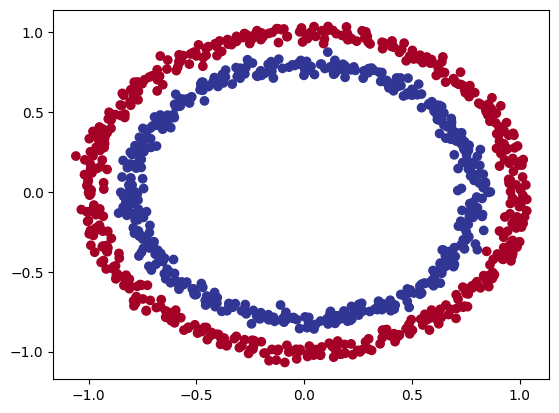

In [107]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y, cmap=plt.cm.RdYlBu);